# Example analysis on the NASA / IMS bearing dataset 

This notebook demonstrates some of the features provided by jypyter notebooks and python, along with selected python visualization libaries. 

 - [Matplotlib](http://matplotlib.org/users/installing.html)
 - [Pandas](http://pandas.pydata.org/)
 - [Numpy](http://www.numpy.org/)

# Dataset background

In this notebook we work with Dataset No. 1:

- Recording Duration: October 22, 2003 12:06:24 to November 25, 2003 23:39:56
- No. of Files: 2,156
- No. of Channels: 8
- Channel Arrangement: 
 - Bearing 1 – Ch 1&2; 
 - Bearing 2 – Ch 3&4;
 - Bearing 3 – Ch 5&6; 
 - Bearing 4 – Ch 7&8.
 
- File Recording Interval: Every 10 minutes (except the first 43 files were taken every 5 minutes)
- File Format: ASCII
- Description: At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4.
- Each data set consists of individual files that are 1-second vibration signal snapshots recorded at specific intervals. Each file consists of 20,480 points with the sampling rate set at 20 kHz

## Notebook setup

All notebooks are evaluated sequentially, by execuding the **code cells**. Initially, we start by setting up the include libaries in this notebook, and the plot configuration 

In [10]:
#keep plot inside the notebook
%matplotlib inline   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
#figsize(15, 5)


In [1]:
%%bash
#acess to a console, might work on windows...

#list files in the subfolder below, on windows replace "ls" with "dir"
ls  bearing_IMS/1st_test/


2003.10.22.12.06.24
2003.10.22.12.09.13
2003.10.22.12.14.13
2003.10.22.12.19.13
2003.10.22.12.24.13
2003.10.22.12.29.13
2003.10.22.12.34.13
2003.10.22.12.39.13
2003.10.22.12.44.13
2003.10.22.12.49.13
2003.10.22.12.54.13
2003.10.22.12.59.13
2003.10.22.13.04.13
2003.10.22.13.09.13
2003.10.22.13.14.13
2003.10.22.13.19.13
2003.10.22.13.24.13
2003.10.22.13.29.13
2003.10.22.13.34.13
2003.10.22.13.39.13
2003.10.22.13.44.13
2003.10.22.13.49.13
2003.10.22.13.54.13
2003.10.22.13.59.13
2003.10.22.14.04.13
2003.10.22.14.09.13
2003.10.22.14.14.13
2003.10.22.14.19.13
2003.10.22.14.24.13
2003.10.22.14.29.13
2003.10.22.14.34.13
2003.10.22.14.39.13
2003.10.22.14.44.13
2003.10.22.14.49.13
2003.10.22.14.54.13
2003.10.22.14.59.13
2003.10.22.15.04.13
2003.10.22.15.09.13
2003.10.22.15.14.13
2003.10.22.15.19.13
2003.10.22.15.24.13
2003.10.22.15.29.13
2003.10.22.15.37.48
2003.10.22.15.44.13
2003.10.22.15.54.13
2003.10.22.16.04.13
2003.10.22.16.14.13
2003.10.22.16.24.13
2003.10.22.16.34.13
2003.10.22.16.44.13


## Reading a dataset

Read first tab separated dataset into a **panda**, named **samples**, using *read_table* function, *sep* indicates the data field separator, in this case **tab** *\t*. *Names* defines the headings for each *data column* in the dataset

In [17]:
samples = pd.read_table('bearing_IMS/1st_test/2003.10.22.12.06.24',sep='\t',
                        names = ["Bearing 1.1", "Bearing 1.2", "Bearing 2.1", "Bearing 2.2", "Bearing 3.1", "Bearing 3.2", 
                                 "Bearing 4.1", "Bearing 4.2"])
#samples=pd.DataFrame('bearing_IMS/1st_test/2003.10.22.12.06.24', columns = ["a", "s", "c", "d", "e", "f", "g", "h"])


List the column names along with the the first 5 table entries from **samples**

In [20]:
samples[:5]

,Bearing 1.1,Bearing 1.2,Bearing 2.1,Bearing 2.2,Bearing 3.1,Bearing 3.2,Bearing 4.1,Bearing 4.2
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066


Print the size of the dataset *samples*

In [21]:
samples.size

163840


Describe shows a quick statistic summary of your data

In [24]:
samples.describe()

,Bearing 1.1,Bearing 1.2,Bearing 2.1,Bearing 2.2,Bearing 3.1,Bearing 3.2,Bearing 4.1,Bearing 4.2
count,20480.000000,20480.00000,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000
mean,-0.094593,-0.09388,-0.093817,-0.093752,-0.090812,-0.090881,-0.090969,-0.094235
std,0.081124,0.07065,0.090650,0.077510,0.091463,0.095488,0.060086,0.066382
min,-0.720000,-0.56400,-0.674000,-0.530000,-0.496000,-0.784000,-0.413000,-0.471000
25%,-0.146000,-0.13900,-0.156000,-0.146000,-0.151000,-0.154000,-0.129000,-0.134000
50%,-0.095000,-0.09300,-0.093000,-0.093000,-0.090000,-0.090000,-0.090000,-0.095000
75%,-0.042000,-0.04900,-0.032000,-0.042000,-0.029000,-0.029000,-0.054000,-0.054000
max,0.388000,0.70100,0.359000,0.256000,0.400000,0.415000,0.249000,0.374000


## Plotting data using matplotlib 

Now we can plot any number of samples, less than **samples.size** directly from **samples**

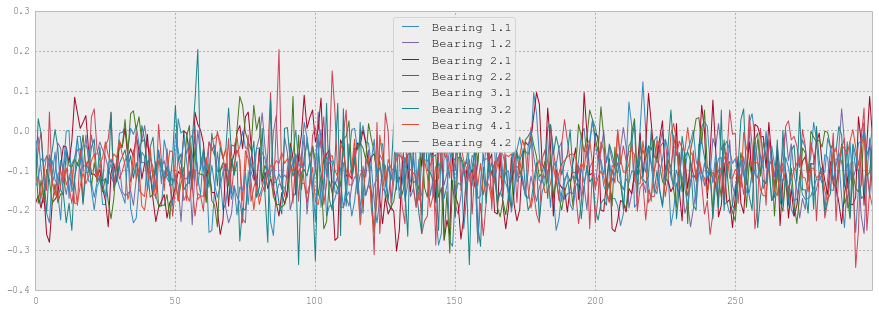

In [35]:
samples[0:300].plot()  #here we plot 300 samples

We can increase the figuresize, for a single plot, and adjust the number of samples, and select a few plots only, in this case column 3 & 4

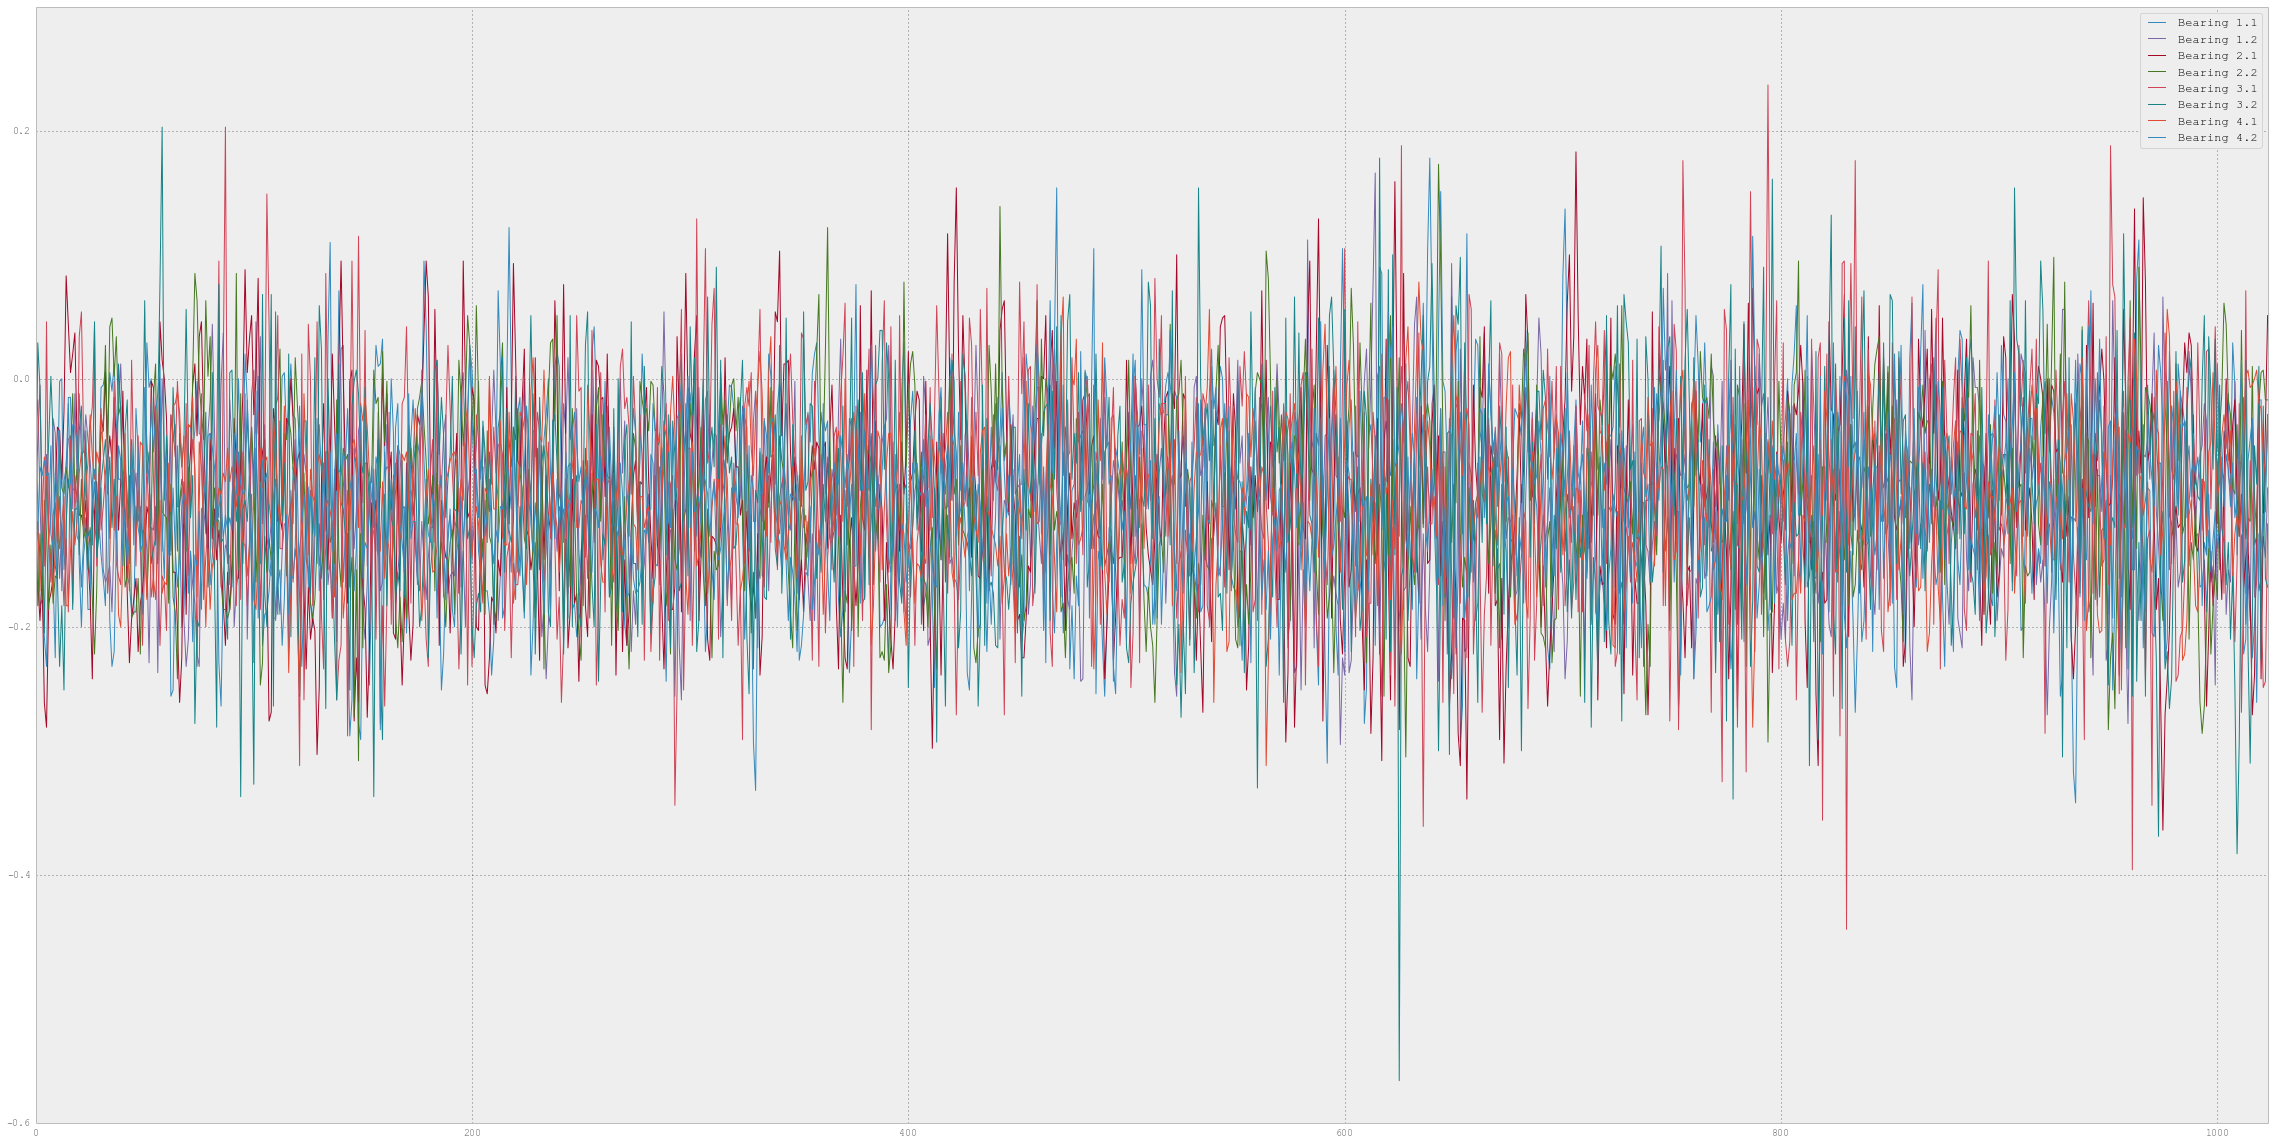

In [68]:
#samples[0:samples.size].plot() #not supoorted by graphsize
#plot(figsize=(30, 20))
samples[0:1024].plot(figsize=(40, 20))

## Select data of interest - Bearing 3

Read selected columns, in this case we are interested in the first columns 5 & 6, from Bearing 3. We read one of the first datasets, and the 5'th last dataset, where the damage on bearing 3 should have occured.

At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4.
Read a dataset app 10% into the sample sets, to ensure break-in of the bearing
Findout how many files we have
And the we select the 5'th last fileset

In [100]:
import fnmatch
import os

dirpath = 'bearing_IMS/1st_test/'
print len(fnmatch.filter(os.listdir(dirpath), '*.*'))

924


### Plot the data

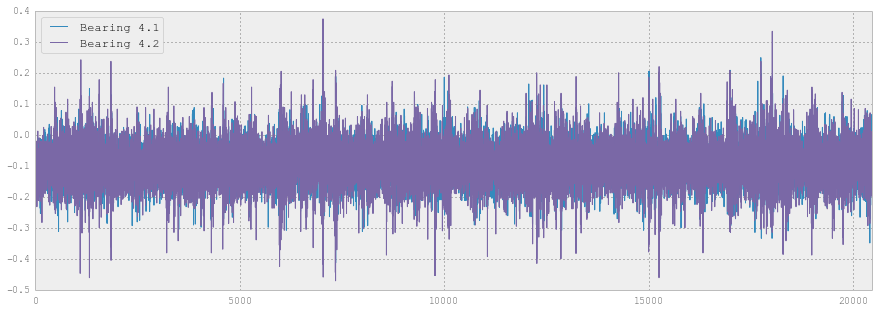

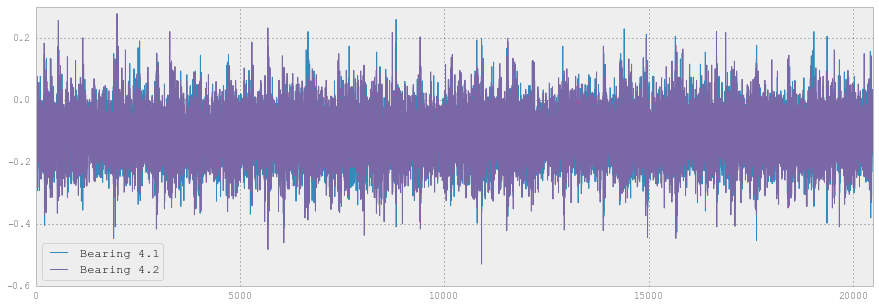

In [94]:
samplesB1_start = pd.read_table('bearing_IMS/1st_test/2003.10.22.12.06.24',
                          sep='\t',
                          names = ["Bearing 1.1", "Bearing 1.2", "Bearing 2.1", "Bearing 2.2", "Bearing 3.1", "Bearing 3.2", 
                                 "Bearing 4.1", "Bearing 4.2"],
#                         usecols = ["Bearing 4.1"])
                         usecols = ["Bearing 4.1", "Bearing 4.2"])


samplesB1_end = pd.read_table('bearing_IMS/1st_test/2003.11.14.15.22.17',
                          sep='\t',
                          names = ["Bearing 1.1", "Bearing 1.2", "Bearing 2.1", "Bearing 2.2", "Bearing 3.1", "Bearing 3.2", 
                                 "Bearing 4.1", "Bearing 4.2"],
#                         usecols = ["Bearing 4.1"])
                         usecols = ["Bearing 4.1", "Bearing 4.2"])



samplesB1_start.plot()
samplesB1_end.plot()
#samplesB1_end[0:1024].plot()

Not much analysis can be made from the raw data, so initially we can compare the basic statistic features of the two datasets.

Following are the measures of central tendency:
- Mean – or the average
- Median – the value, which divides the population in two half
- Mode – the most frequent value in a population

More on statistics [https://www.analyticsvidhya.com/blog/2014/07/statistics/]

In [95]:
samplesB1_start.describe()


,Bearing 4.1,Bearing 4.2
count,20480.000000,20480.000000
mean,-0.090969,-0.094235
std,0.060086,0.066382
min,-0.413000,-0.471000
25%,-0.129000,-0.134000
50%,-0.090000,-0.095000
75%,-0.054000,-0.054000
max,0.249000,0.374000


In [99]:
samplesB1_end.describe()

,Bearing 4.1,Bearing 4.2
count,20480.000000,20480.000000
mean,-0.115127,-0.115211
std,0.070968,0.076410
min,-0.454000,-0.530000
25%,-0.161000,-0.164000
50%,-0.115000,-0.115000
75%,-0.071000,-0.068000
max,0.259000,0.278000


## Create boxplots

Create a boxplot to shown the statistic distributions of the datapoints

{'boxes': [<matplotlib.lines.Line2D at 0x114891250>],
 'caps': [<matplotlib.lines.Line2D at 0x1142dac10>,
 'fliers': [<matplotlib.lines.Line2D at 0x114891ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x114891890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x114877d50>,
  <matplotlib.lines.Line2D at 0x114877fd0>]}

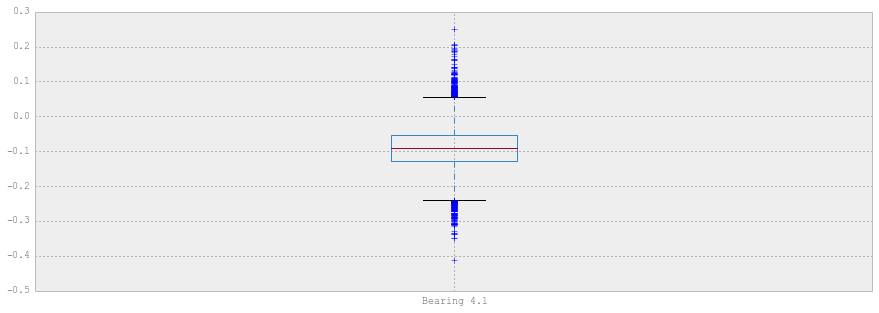

In [104]:

samplesB1_start.boxplot(column='Bearing 4.1',)


Combine the data into one numpy array using **np.concatenate** and display the dimensions

In [118]:
d2 = np.concatenate((samplesB1_start, samplesB1_end), 0)
print "Array dimensions :" + str(d2.ndim) + " Array length :" + str(d2.size) 

Array dimensions :2 Array length :81920


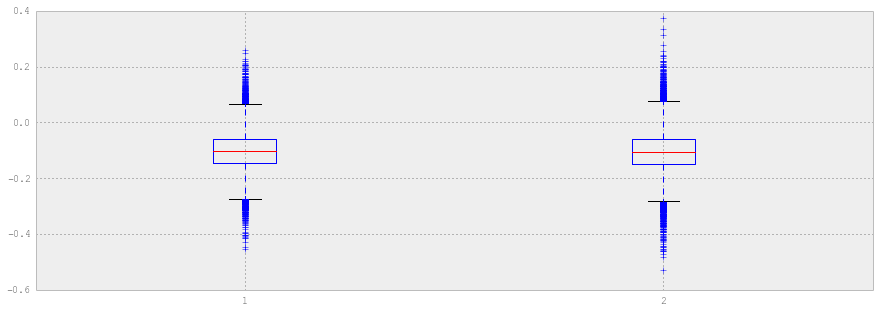

In [124]:
plt.figure()
plt.boxplot(d2)
plt.show()

## More analysis features

Following are a list of libraries, you will need for any scientific computations and data analysis:

- **NumPy** stands for Numerical Python. The most powerful feature of NumPy is n-dimensional array. This library also contains basic linear algebra functions, Fourier transforms,  advanced random number capabilities and tools for integration with other low level languages like Fortran, C and C++
- **SciPy** stands for Scientific Python. SciPy is built on NumPy. It is one of the most useful library for variety of high level science and engineering modules like discrete Fourier transform, Linear Algebra, Optimization and Sparse matrices.
- **Matplotlib** for plotting vast variety of graphs, starting from histograms to line plots to heat plots.. You can use Pylab feature in ipython notebook (ipython notebook –pylab = inline) to use these plotting features inline. If you ignore the inline option, then pylab converts ipython environment to an environment, very similar to Matlab. You can also use Latex commands to add math to your plot.
- **Pandas** for structured data operations and manipulations. It is extensively used for data munging and preparation. Pandas were added relatively recently to Python and have been instrumental in boosting Python’s usage in data scientist community.
- **Scikit Learn** for machine learning. Built on NumPy, SciPy and matplotlib, this library contains a lot of effiecient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
- **Statsmodels** for statistical modeling. Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator.
- **Seaborn** for statistical data visualization. Seaborn is a library for making attractive and informative statistical graphics in Python. It is based on matplotlib. Seaborn aims to make visualization a central part of exploring and understanding data.
- **Bokeh** for creating interactive plots, dashboards and data applications on modern web-browsers. It empowers the user to generate elegant and concise graphics in the style of D3.js. Moreover, it has the capability of high-performance interactivity over very large or streaming datasets.
- **Blaze** for extending the capability of Numpy and Pandas to distributed and streaming datasets. It can be used to access data from a multitude of sources including Bcolz, MongoDB, SQLAlchemy, Apache Spark, PyTables, etc. Together with Bokeh, Blaze can act as a very powerful tool for creating effective visualizations and dashboards on huge chunks of data.
- **Scrapy** for web crawling. It is a very useful framework for getting specific patterns of data. It has the capability to start at a website home url and then dig through web-pages within the website to gather information.
- **SymPy** for symbolic computation. It has wide-ranging capabilities from basic symbolic arithmetic to calculus, algebra, discrete mathematics and quantum physics. Another useful feature is the capability of formatting the result of the computations as LaTeX code. Requests for accessing the web. It works similar to the the standard python library urllib2 but is much easier to code. You will find subtle differences with urllib2 but for beginners, Requests might be more convenient.

924


In [ ]:
sampleset1.size